In [ ]:
## Purpose of the notebook
1. reduce the number of features with PCA to 20
2. split the data on train-val-test sets
3. prepare the data and parameters for gradient boosting classifier fitting
4. tune parameters on validation data
5. test the best model on the test data

In [1]:
import pandas as pd
df = pd.read_csv('../../Data_processed/dif_abs_value_full_040720.csv')
df.head()

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,354,355,356,357,358,359,Patient_number,Label,Label_class,Output_label
0,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,-0.010,-0.010,0.000,0.005,0.005,0.015,100,N,N,0.0
1,1,0.005,-0.025,-0.015,0.000,-0.010,0.005,-0.005,-0.005,-0.010,...,0.000,0.000,-0.025,0.010,0.005,0.005,100,N,N,0.0
2,2,-0.005,-0.005,0.005,-0.025,-0.015,-0.010,0.005,0.010,0.000,...,-0.005,0.005,0.015,-0.010,-0.005,-0.015,100,N,N,0.0
3,3,-0.015,-0.015,-0.020,-0.005,-0.005,0.005,0.000,-0.010,-0.005,...,0.005,-0.005,-0.015,0.020,0.000,0.010,100,N,N,0.0
4,4,-0.005,0.005,0.005,-0.010,-0.020,-0.010,0.015,-0.005,-0.010,...,0.010,0.010,0.020,-0.010,-0.005,-0.005,100,N,N,0.0


### 1. Perform feature reduction with PCA

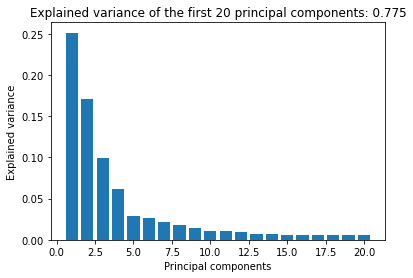

In [2]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import numpy as np
X = df.drop(columns = ['Unnamed: 0', 'Patient_number', 'Label', 'Label_class', 'Output_label'], axis=1)
y = df['Output_label']
target_names = ['N', 'S', 'V', 'F']
pca = PCA(n_components=20)
X_r = pca.fit(X).transform(X)
plt.bar(list(range(1,21)), pca.explained_variance_ratio_)
plt.xlabel('Principal components')
plt.ylabel('Explained variance')
explained_var = np.sum(pca.explained_variance_ratio_)
title = "Explained variance of the first 20 principal components: {}".format(round(explained_var,3))
plt.title(title)
plt.show()

### 2. split the data on train-val-test sets

In [3]:
train = [101, 103, 105, 106, 109, 111, 112, 113, 115, 116, 117, 119, 121, 122, 123,\
         200, 201, 202, 205, 207, 208, 209, 212, 219, 221, 222, 230, 231, 232, 233]
    
val = [100, 124, 215, 223]

test = [108, 114, 118, 203, 210, 213, 214, 220, 228, 234]

In [4]:
# construct a dataframe from the reduced feature array
df_r = pd.DataFrame(X_r)
df_r.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,0.050786,0.391651,-0.178485,0.306758,-0.240656,0.143067,0.081154,0.022355,-0.011420,0.015371,-0.081245,0.089815,0.029244,0.027875,0.002381,-0.043368,-0.033244,-0.034998,0.014787,-0.044638
1,0.297323,0.138319,-0.148956,0.190143,-0.087654,0.079699,-0.038270,-0.043619,-0.030912,0.028176,0.024245,-0.037944,0.043730,0.137138,0.048058,0.021714,0.000127,0.032767,-0.026337,0.037962
2,0.235598,0.441948,-0.274324,0.107976,-0.310303,-0.190474,0.097972,0.196435,0.102748,-0.187137,0.087318,0.037663,-0.007711,-0.048443,-0.008942,0.046931,0.015861,0.042912,-0.038701,0.044276
3,0.227483,0.463418,-0.216962,0.109937,-0.246306,-0.145597,0.037086,0.182033,0.067624,-0.214044,0.087904,0.077078,-0.019540,0.073363,-0.026969,-0.036818,-0.002272,0.083219,0.039433,0.008428
4,0.063840,0.491614,-0.152614,0.211571,-0.335745,0.065443,0.120603,0.094058,0.053514,0.009776,-0.062029,0.190344,-0.069839,-0.128718,-0.034483,0.029278,0.027302,-0.022127,0.027251,-0.091199


In [5]:
# add the patient number and output label to the dataframe
df_r = pd.concat([df_r, df[['Patient_number', 'Output_label']]], axis=1)
df_r.values.shape

(100718, 22)

In [6]:
# split the data between train-val-test
df_r_train = df_r.loc[df_r['Patient_number'].isin(train)]
df_r_val = df_r.loc[df_r['Patient_number'].isin(val)]
df_r_test = df_r.loc[df_r['Patient_number'].isin(test)]

### 3. prepare the data and parameters for gradient boosting classifier fitting

In [10]:
# get all the samples as a numpy array
x_train = df_r_train.drop(['Patient_number', 'Output_label'], axis=1).values
x_val = df_r_val.drop(['Patient_number', 'Output_label'], axis=1).values
x_test = df_r_test.drop(['Patient_number', 'Output_label'], axis=1).values

# for multilabel classification the label vector needs to be one-hot encoded
y_train = df_r_train.Output_label
y_val = df_r_val.Output_label
y_test = ### 3. prepare the data and parameters for random forest classifier fittingdf_r_test.Output_label

# inspect resulting array sizes
print("Training data:")
print("X", x_train.shape)
print("y", y_train.shape)
print("Validation data:")
print("X", x_val.shape)
print("y", y_val.shape)
print("Testing data:")
print("X", x_test.shape)
print("y", y_test.shape)

Training data:
X (66947, 20)
y (66947,)
Validation data:
X (9860, 20)
y (9860,)
Testing data:
X (23911, 20)
y (23911,)


In [17]:
# function for score evaluation - f1 score (without class N) 
epsilon = np.finfo(float).eps
def f1_metric(cm):
    true_positives = np.sum(np.diag(cm[1:,1:]))
    possible_positives = np.sum(cm[1:,:])
    predicted_positives = np.sum(cm[:,1:])
    precision = true_positives/(predicted_positives+epsilon)
    recall = true_positives/(possible_positives+epsilon)
    f1_val = 2*(precision*recall)/(precision+recall+epsilon)
    return f1_val

### 4. tune parameters on validation data

In [12]:
from sklearn.metrics import confusion_matrix

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix
random_state=2020

n_estimators=[25, 50, 100, 200]
max_depth=[1, 3, 9, 27]
f1_scores_train = []
f1_scores_val = []
for n in n_estimators:
    for m in max_depth:
        print("Traning classifier with n_estimators {} and max_depth {}.".format(n,m))
        clf = GradientBoostingClassifier(random_state=random_state, n_estimators=n, max_depth=m)
        # train the model and save for later
        clf.fit(x_train, y_train)

        # predict classes for samples in train and test
        y_pred_train = clf.predict(x_train)
        y_pred_val = clf.predict(x_val)

        # compute the confusion matrix for train and test data
        cm_train = confusion_matrix(y_train, y_pred_train)
        f1_score_train = f1_metric(cm_train)
        f1_scores_train.append(f1_score_train)
        cm_val = confusion_matrix(y_val, y_pred_val)
        print(cm_val)
        f1_score_val = f1_metric(cm_val)
        f1_scores_val.append(f1_score_val)

Text(0.5, 1.0, 'Train and validation data scores')

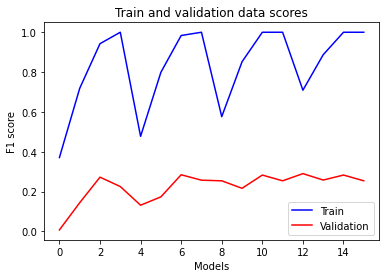

In [27]:
import matplotlib.pyplot as plt
plt.plot(f1_scores_train, c='b', label='Train')
plt.plot(f1_scores_val, c='r', label='Validation')
plt.legend()
plt.xlabel("Models")
plt.ylabel("F1 score")
plt.title("Train and validation data scores")

In [31]:
f1_scores_val.index(max(f1_scores_val))

12

index 12 corresponds to n_estimators 200 and max_depth 1

In [32]:
f1_scores_val

[0.007042253521126756,
 0.1436377829820452,
 0.2719999999999999,
 0.22490347490347476,
 0.13121693121693118,
 0.17299824663939206,
 0.2841015992474129,
 0.25690486628671627,
 0.2536924413553431,
 0.21610805402701339,
 0.2825983878615457,
 0.25372498935717314,
 0.289820359281437,
 0.25751458052938525,
 0.28260869565217384,
 0.25372498935717314]

Text(0.5, 1.0, 'Train and validation data scores')

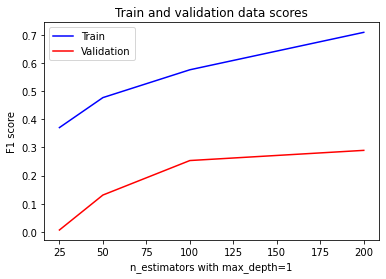

In [37]:
plt.plot(n_estimators, f1_scores_train[0:16:4], c='b', label='Train')
plt.plot(n_estimators, f1_scores_val[0:16:4], c='r', label='Validation')
plt.legend()
plt.xlabel("n_estimators with max_depth=1")
plt.ylabel("F1 score")
plt.title("Train and validation data scores")

Text(0.5, 1.0, 'Train and validation data scores with max_depth=3')

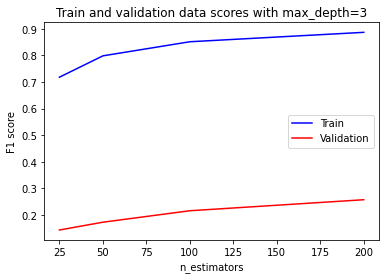

In [46]:
plt.plot([25, 50, 100, 200], f1_scores_train[1:16:4], c='b', label='Train')
plt.plot([25, 50, 100, 200], f1_scores_val[1:16:4], c='r', label='Validation')
plt.legend()
plt.xlabel("n_estimators")
plt.ylabel("F1 score")
plt.title("Train and validation data scores with max_depth=3")

Text(0.5, 1.0, 'Train and validation data scores')

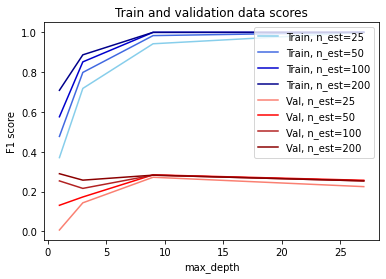

In [51]:
plt.plot([1, 3, 9, 27], f1_scores_train[0:4], c='SkyBlue', label='Train, n_est=25')
plt.plot([1, 3, 9, 27], f1_scores_train[4:8], c='RoyalBlue', label='Train, n_est=50')
plt.plot([1, 3, 9, 27], f1_scores_train[8:12], c='MediumBlue', label='Train, n_est=100')
plt.plot([1, 3, 9, 27], f1_scores_train[12:16], c='DarkBlue', label='Train, n_est=200')

plt.plot([1, 3, 9, 27], f1_scores_val[0:4], c='Salmon', label='Val, n_est=25')
plt.plot([1, 3, 9, 27], f1_scores_val[4:8], c='Red', label='Val, n_est=50')
plt.plot([1, 3, 9, 27], f1_scores_val[8:12], c='FireBrick', label='Val, n_est=100')
plt.plot([1, 3, 9, 27], f1_scores_val[12:16], c='DarkRed', label='Val, n_est=200')

plt.legend()
plt.xlabel("max_depth")
plt.ylabel("F1 score")
plt.title("Train and validation data scores")

### Interpretation
n_estimator size doesn't matter at max_depth>10. 25 and 50 estimators perform poorly for the val set (for max_depth<10), while 100 and 200 have similar performance, with 200 outperforming 100 n_estimators. Next try varying max_depth parameter slowly between 1 and 10  with n_estimators=200.

In [68]:
n_estimators=[200]
max_depth=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

for n in n_estimators:
    for m in max_depth:
        print("Traning classifier with n_estimators {} and max_depth {}.".format(n,m))
        clf = GradientBoostingClassifier(random_state=random_state, n_estimators=n, max_depth=m)
        # train the model and save for later
        clf.fit(x_train, y_train)

        # predict classes for samples in train and test
        y_pred_train = clf.predict(x_train)
        y_pred_val = clf.predict(x_val)

        # compute the confusion matrix for train and test data
        cm_train = confusion_matrix(y_train, y_pred_train)
        f1_score_train = f1_metric(cm_train)
        f1_scores_train.append(f1_score_train)
        cm_val = confusion_matrix(y_val, y_pred_val)
        print(cm_val)
        f1_score_val = f1_metric(cm_val)
        f1_scores_val.append(f1_score_val)

Traning classifier with n_estimators 200 and max_depth 1.
[[8443  353  219    0]
 [ 137    1    2    0]
 [ 438    2  241    4]
 [  17    0    3    0]]
Traning classifier with n_estimators 200 and max_depth 2.
[[7983  695  335    2]
 [ 133    3    4    0]
 [ 392    5  286    2]
 [  13    0    7    0]]
Traning classifier with n_estimators 200 and max_depth 3.
[[7941  732  327   15]
 [ 138    1    0    1]
 [ 384   12  286    3]
 [  13    0    7    0]]
Traning classifier with n_estimators 200 and max_depth 4.
[[7889  568  542   16]
 [ 136    1    2    1]
 [ 336    5  336    8]
 [  13    0    7    0]]
Traning classifier with n_estimators 200 and max_depth 5.
[[8042  479  472   22]
 [ 135    1    3    1]
 [ 338    8  331    8]
 [  12    0    8    0]]
Traning classifier with n_estimators 200 and max_depth 6.
[[8019  479  492   25]
 [ 135    2    2    1]
 [ 368    4  308    5]
 [  13    0    7    0]]
Traning classifier with n_estimators 200 and max_depth 7.
[[7817  471  393  334]
 [ 136    2  

Text(0.5, 1.0, 'Train and validation data scores with n_estimators=200')

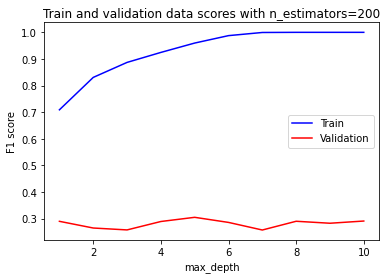

In [69]:
plt.plot(max_depth, f1_scores_train[-10:], c='b', label='Train')
plt.plot(max_depth, f1_scores_val[-10:], c='r', label='Validation')
plt.legend()
plt.xlabel("max_depth")
plt.ylabel("F1 score")
plt.title("Train and validation data scores with n_estimators=200")

In [71]:
f1_scores_val[-10:].index(max(f1_scores_val[-10:]))

4

### Interpretation
Validation F1 score reaches a maxium at max_delpth=5, after which the model overfits - train data fits with higher F1 score, while val F1 score essentially stays the same. Use n_estimators=200 and max_depth=5
### 5. test the best model on test data

In [62]:
# compute base f1 score without tuning for comparison
clf_base = GradientBoostingClassifier(random_state=random_state)
# train the model and save for later
clf_base.fit(x_train, y_train)

# predict classes for samples in train and test
y_pred_train = clf_base.predict(x_train)
y_pred_test = clf_base.predict(x_test)

# compute the confusion matrix for train and test data
cm_train_base = confusion_matrix(y_train, y_pred_train)
print(cm_train_base)
f1_score_train_base = f1_metric(cm_train_base)
print(f1_score_train_base)
cm_test_base = confusion_matrix(y_test, y_pred_test)
print(cm_test_base)
f1_score_test_base = f1_metric(cm_test_base)
print(f1_score_test_base)

[[59047   297    96     6]
 [  950  1368    12     0]
 [  532    20  4206    10]
 [   63     1    13   326]]
0.8516166281755194
[[20157    28  1438    41]
 [  253     8    42     8]
 [  562    11   908    75]
 [  201     0   105    74]]
0.3971915747241724


In [55]:
# compute f1 score with tuning
clf = GradientBoostingClassifier(random_state=random_state, n_estimators=100, max_depth=4)
# train the model and save for later
clf.fit(x_train, y_train)

# predict classes for samples in train and test
y_pred_train = clf.predict(x_train)
y_pred_test = clf.predict(x_test)

# compute the confusion matrix for train and test data
cm_train = confusion_matrix(y_train, y_pred_train)
print(cm_train)
f1_score_train = f1_metric(cm_train)
print(f1_score_train)
cm_test = confusion_matrix(y_test, y_pred_test)
print(cm_test)
f1_score_test = f1_metric(cm_test)
print(f1_score_test)

[[59080   280    81     5]
 [  795  1523    12     0]
 [  316     7  4444     1]
 [   24     0     6   373]]
0.8908873744115786
[[19049    34  2509    72]
 [  222    18    63     8]
 [  489    10   995    62]
 [  216     0   122    42]]
0.3413134907796829


In [72]:
# compute base f1 score with tuning
clf = GradientBoostingClassifier(random_state=random_state, n_estimators=200, max_depth=5)
# train the model and save for later
clf.fit(x_train, y_train)

# predict classes for samples in train and test
y_pred_train = clf.predict(x_train)
y_pred_test = clf.predict(x_test)

# compute the confusion matrix for train and test data
cm_train = confusion_matrix(y_train, y_pred_train)
print(cm_train)
f1_score_train = f1_metric(cm_train)
print(f1_score_train)
cm_test = confusion_matrix(y_test, y_pred_test)
print(cm_test)
f1_score_test = f1_metric(cm_test)
print(f1_score_test)

[[59271   160    15     0]
 [  350  1976     4     0]
 [   58     2  4708     0]
 [    0     0     0   403]]
0.9597129121809194
[[18557    46  2778   283]
 [  218    21    65     7]
 [  400    17  1106    33]
 [  192     2   144    42]]
0.34427919304962445


### GBM classifier without tuning performs better than with tuning. Use out-of-the-bag model for final evaluation.
### 6. final model evaluation based on established metrics

In [1]:
def modelEvaluator(cm):
    epsilon =  np.finfo(float).eps
    # actual normal
    Nn = cm[0,0]
    Ns = cm[0,1]
    Nv = cm[0,2]
    Nf = cm[0,3]
    # actual Supraventricular
    Sn = cm[1,0]
    Ss = cm[1,1]
    Sv = cm[1,2]
    Sf = cm[1,3]
    # actual Ventricular
    Vn = cm[2,0]
    Vs = cm[2,1]
    Vv = cm[2,2]
    Vf = cm[2,3]
    # actual Fusion
    Fn = cm[3,0]
    Fs = cm[3,1]
    Fv = cm[3,2]
    Ff = cm[3,3]
    
    sum_all = np.sum(cm)
    # metrics for distinguishing ventricular ectopic beats
    TNv = Nn + Ns + Nf + Sn + Ss + Sf + Fn + Fs + Ff # (True negative V)
    FPv = Nv + Sv #(False positive V)
    fprV = FPv / (TNv + FPv + epsilon) #(false positive rate V)
    FNv = Vn + Vs +Vf # (False negative V)
    TPv = Vv #(True positive V)
    SeV = TPv / (TPv + FNv + epsilon) #(sensitivity or recall V)
    PrV = TPv / (TPv + FPv + epsilon) #(positive predictivity or precision V)
    AccV = (TPv + TNv) / (TPv + TNv + FPv + FNv + epsilon) #(Accuracy V)
    
    # metrics for distinguishing supraventricular ectopic beats
    TNs = Nn + Nv + Nf + Vn + Vv + Vf + Fn + Fv + Ff #(True negative S)
    FPs= Ns + Vs + Fs #(False positive S)
    fprS = FPs / (TNs + FPs + epsilon) #(false positive rate S)
    FNs = Sn + Sv +Sf #(False negative S)
    TPs = Ss #(True positive S)
    SeS = TPs / (TPs + FNs + epsilon) #( sensitivity or recall S)
    PrS = TPs / (TPs + FPs + epsilon) #(positive predictivity or precision S)
    AccS = (TPs + TNs) / (TPs + TNs + FPs + FNs + epsilon) #(Accuracy S)
    
    # metrics for distinguishing all beats
    TN = Nn #(True negative)
    TPf = Ff
    FPN = Ns + Nv + Nf # false positive N class
    Sp = TN/(TN + FPN + epsilon)
    sum_f = Fn + Fs + Fv + Ff
    SeF = TPf/(sum_f + epsilon)
    Acc = (Nn + Ss + Vv + Ff)/sum_all
    
    return_array = [round(SeV, 3), round(PrV, 3), round(fprV, 3), round(AccV, 3), round(SeS, 3), round(PrS, 3),\
                    round(fprS, 3), round(AccS, 3), round(SeF, 3), round(Sp, 3), round(Acc, 3)]
    return return_array

In [6]:
return_array = modelEvaluator(cm_test_base)
return_array = pd.Series(return_array, index=['SeV', 'PrV', 'fprV', 'AccV', 'SeS', 'PrS', 'fprS', 'AccS', 'SeF', 'Sp', 'Acc'])
return_array

SeV     0.584
PrV     0.380
fprV    0.067
AccV    0.911
SeS     0.026
PrS     0.170
fprS    0.002
AccS    0.986
SeF     0.195
Sp      0.930
Acc     0.884
dtype: float64

In [66]:
import pickle
filename = '../../models/finalized_GBc_model.sav'
pickle.dump(clf_base, open(filename, 'wb'))

In [67]:
clf_base

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=2020, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [ ]:
ave_recall = (18+995+42)/2247
ave_prec = (18+995+42)/(34+2509+72+18+63+8+10+995+62+122+42)
print(ave_recall)
print